<a href="https://colab.research.google.com/github/Luluabidah/Unsupervised-Learning/blob/main/C2_23_UL_A_20123094_Lulu_Abidah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

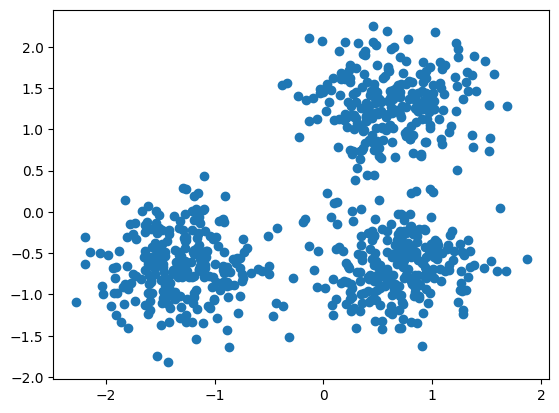

Estimated number of clusters: 3
Estimated number of noise points: 18


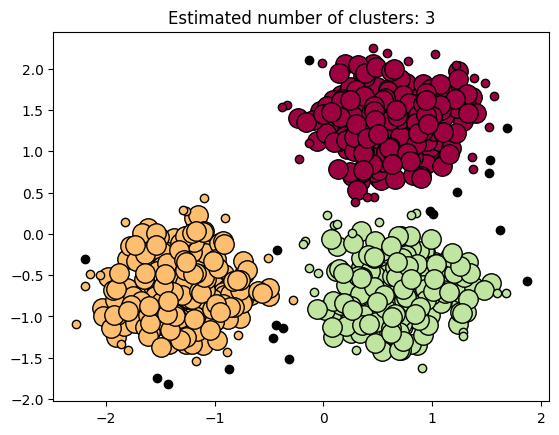

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


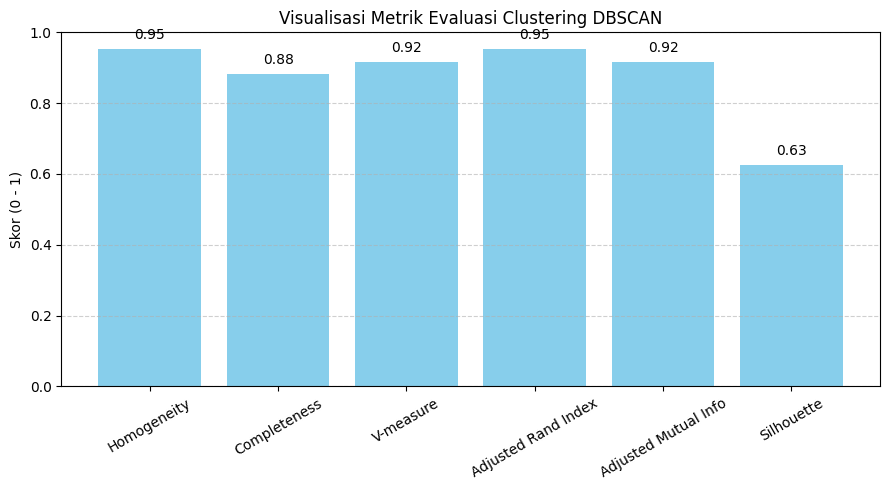

In [8]:
#Menggunakan fungsi make_blobs untuk menghasilkan tiga kelompok data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
#Menstandarkan fitur agar memiliki mean 0 dan standard deviation 1.
#Hal ini penting agar DBSCAN tidak bias oleh skala data.
X = StandardScaler().fit_transform(X)

#Memvisualisasikan Data untuk melihat pola kluster
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

#Proses clustering dengan DBScan
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

#Menghitung jumlah cluster dan noise berdasarkan label hasil DBSCAN.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


#Visualisasi hasil
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

#Mengukur kualitas clustering dengan berbagai metrik
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

# visualisasi bar chart metrik
import matplotlib.pyplot as plt

# Hitung metrik dan simpan ke dictionary
scores = {
    'Homogeneity': metrics.homogeneity_score(labels_true, labels),
    'Completeness': metrics.completeness_score(labels_true, labels),
    'V-measure': metrics.v_measure_score(labels_true, labels),
    'Adjusted Rand Index': metrics.adjusted_rand_score(labels_true, labels),
    'Adjusted Mutual Info': metrics.adjusted_mutual_info_score(labels_true, labels),
    'Silhouette': metrics.silhouette_score(X, labels)
}

# Buat bar chart
plt.figure(figsize=(9, 5))
bars = plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Skor (0 - 1)')
plt.title('Visualisasi Metrik Evaluasi Clustering DBSCAN')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tambahkan angka di atas tiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
